[*********************100%***********************]  2 of 2 completed

直近3年の日次リターン相関係数（6420.T vs 141A.T）：0.082
90日ローリング相関の最新値：0.026



/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:59: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:59: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:59: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:59: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:59: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/var/folders/8g/t5_

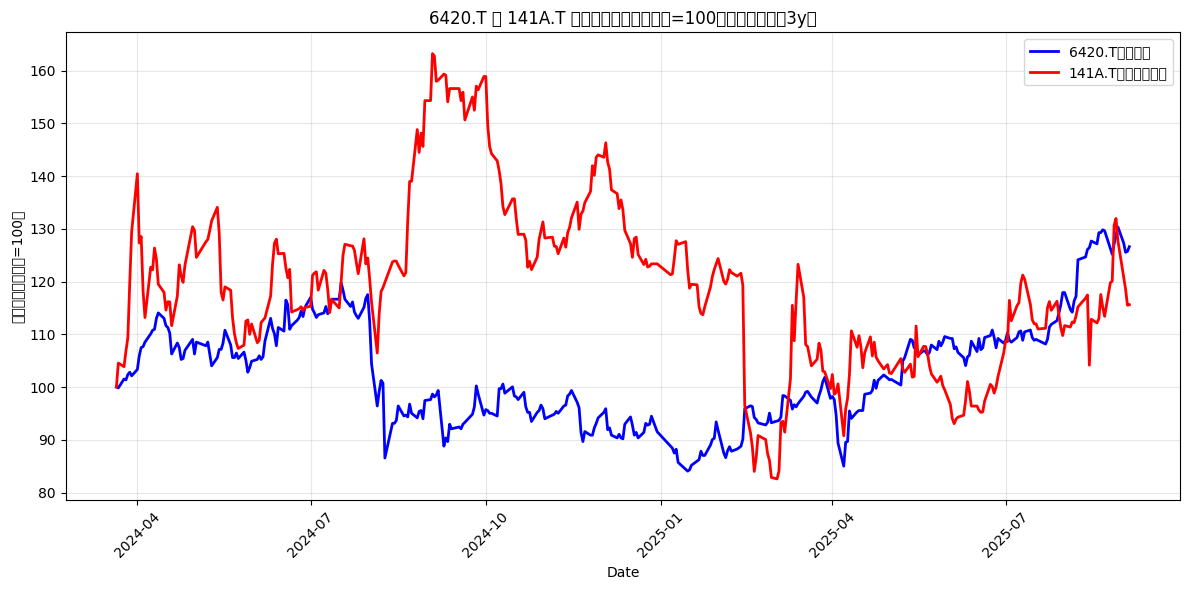

/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:75: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig2.tight_layout()
/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:75: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig2.tight_layout()
/var/folders/8g/t5_zs22j2s590dkg15k0hy880000gn/T/ipykernel_91714/3071522308.py:75: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig2.tight_layout()
/Users/senatakasawa/Finance/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


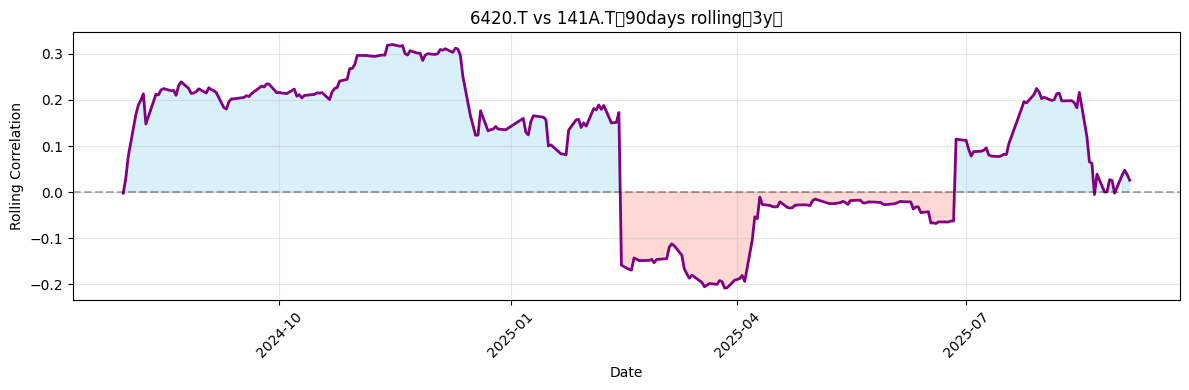

In [24]:
# ==== パラメータ（ここだけ変えれば流用可）==========================
STOCK  = "6420.T"   # 個別株（例：ガリレイ）
SECTOR = "141A.T"            #1630.T"   # セクター代表（例：小売 TOPIX-17 ETF）
PERIOD = "3y"       # 取得期間
INTERVAL = "1d"     # 粒度
ROLLING_WINDOW = 90 # ローリング相関の窓（営業日）
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 依存：yfinance が未導入なら `python -m pip install yfinance` を実行
import yfinance as yf

# データ取得（調整後終値を使用）
data = (
  yf.download([STOCK, SECTOR], period=PERIOD, interval=INTERVAL, auto_adjust=True)["Close"]
    .dropna()
)

# 欠損除去・列順整備（念のため）
data = data.loc[:, [STOCK, SECTOR]].dropna()

# 日次リターン（単純）
ret = data.pct_change().dropna()

# 相関係数（ピアソン）
corr = ret[STOCK].corr(ret[SECTOR])
print(f"直近3年の日次リターン相関係数（{STOCK} vs {SECTOR}）：{corr:.3f}")

# 60日ローリング相関
roll = ret[STOCK].rolling(ROLLING_WINDOW).corr(ret[SECTOR]).dropna()
print(f"{ROLLING_WINDOW}日ローリング相関の最新値：{roll.iloc[-1]:.3f}")

# ========== 価格推移（最初を100として正規化） ==========
fig, ax1 = plt.subplots(figsize=(12, 6))

# 基準日のデータを100として正規化
normalized_data = data.copy()
for col in normalized_data.columns:
  normalized_data[col] = normalized_data[col] / normalized_data[col].iloc[0] * 100

# グラフ描画
ax1.plot(normalized_data[STOCK], label=f"{STOCK}（個別）", color='blue', linewidth=2)
ax1.plot(normalized_data[SECTOR], label=f"{SECTOR}（セクター）", color='red', linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("指数化価格（開始=100）")
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

# タイトル・凡例
plt.title(f"{STOCK} と {SECTOR} の株価推移比較（初日=100として指数化、{PERIOD}）")
ax1.legend(loc="best")

plt.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

# ========== ローリング相関 ==========
fig2, ax = plt.subplots(figsize=(12, 4))
ax.plot(roll, color='purple', linewidth=2)
ax.set_title(f"{STOCK} vs {SECTOR}：{ROLLING_WINDOW}days rolling（{PERIOD}）")
ax.set_xlabel("Date")
ax.set_ylabel("Rolling Correlation")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax.fill_between(roll.index, roll.values, 0, where=roll.values>0, color='skyblue', alpha=0.3)
ax.fill_between(roll.index, roll.values, 0, where=roll.values<0, color='salmon', alpha=0.3)
plt.grid(True, alpha=0.3)
fig2.tight_layout()
plt.show()


In [23]:
# ==== パラメータ ==================================
STOCK  = "6420.T"   # ガリレイ
SECTOR = "3222.T"#1630.T"   # 小売セクターETF
PERIOD = "3y"
INTERVAL = "1d"
# ================================================
! pip install statsmodels
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

# データ取得
data = (
    yf.download([STOCK, SECTOR], period=PERIOD, interval=INTERVAL, auto_adjust=True)["Close"]
      .dropna()
)

# 日次リターン
ret = data.pct_change().dropna()

# 回帰用データ
X = sm.add_constant(ret[SECTOR])   # 説明変数（セクター）
y = ret[STOCK]                     # 被説明変数（ガリレイ）

# OLS回帰
model = sm.OLS(y, X).fit()

# β, R², αを出力
alpha = model.params["const"]
beta = model.params[SECTOR]
r2 = model.rsquared

print(f"α（切片）     ：{alpha:.5f}")
print(f"β（ベータ値）：{beta:.3f}")
print(f"R²（決定係数）：{r2:.3f}")


[*********************100%***********************]  2 of 2 completed

α（切片）     ：0.00123
β（ベータ値）：0.457
R²（決定係数）：0.076
